<a href="https://colab.research.google.com/github/JannaBabicheva/econometrics/blob/main/Babicheva_%22%D0%94%D0%971_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Условия:

- Домашнее задание не оценивается
- Домашнее задание обязательно (иначе придётся писать допуск к экзамену)
- Дедлайн 23:30 30-го октября
- Можно задавать любые вопросы в лс или в чате
- Самое главное в задании -- корректные с точки зрения эконометрической теории комментарии ко всем содержательным блокам
- Сделанные задания в формате ipynb отправлять на почту vladimirnosko2@gmail.com, добавить в копию kirillova-ma@ranepa.ru

План действий:

   1. Если вы загрузили файл с компьютера, перейдите к шагу 2.

     Если вы перешли по ссылке, жмите: "Файл -> Сохранить копию на Диске"

     и скрипт будет всегда с вами на Google Drive в папке Colab Notebooks

   2. Загрузите файлы c данными через иконку "Файлы -> Загрузить в сессионное хранилище" слева от этого текста

     (файлы удалятся из Colab, сохраните их руками где-то у себя \ в той же папке Colab Notebooks)

   3.  Запустите первый блок с библиотеками, можете на своё усмотрение использовать любые библиотеки

   4. Наслаждайтесь эконометрикой


In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
import scipy.stats as stats
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

!pip install stargazer
from stargazer.stargazer import Stargazer

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

!pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


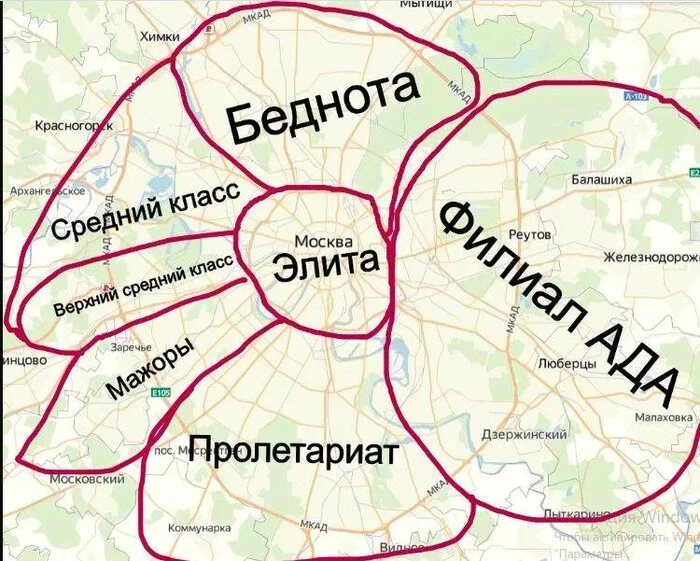

# Задача:

В одной стране ставки по ипотеке очень высокие и люди не могут покупать дорогие квартиры. Строительная компания «Пик-Пик» хочет узнать, какими свойствами должно обладать новое здание, чтобы у квартир в среднем  **стоимость была очень низкой**. К сожалению, приходится держать в уме, что скоро будет принят закон, запрещающий продажу квартир **меньше 28 квадратных метров**.

Представьте, что вам заказали расчёт параметров будущей новостройки в Москве с пояснением, как каждый параметр влияет на среднюю стоимость квартиры.


## Описание данных

Данные заимствованы из https://www.kaggle.com/datasets/alexeyleshchenko/moscow-apartment-listings

The dataset was created by scraping publicly available data in an effort to build a tool for finding undervalued properties in Moscow, 2020


**price**	Listed price in millions of Russian roubles

**repair**	Condition: 1 - worst, 4 - best

**house_age**	2020 minus the year of construction

**dist_to_subway**	Distance to the closest subway in meters

**subway_dist_to_center**	Distance of the closest subway to the city center in meters

**subway_offers**	Number of listings in the vicinity of the same subway station

**rooms**	Number of rooms

**footage**	Total footage in square meters

**floor**	The floor on which the apartment is situated

**max_floor**	Total floors in the building

**first_floor**	"1" if the apartment is on the first floor

**last_floor**	"1" if the apartment is on the top floor

**AO**	District (административный округ)

**hm**	Material from which the building is built

### Задание 1:

Опишите высланные данные (отличаются от оригинального датасета по ссылке) любым способом (статистически \ графически) данные. Расскажите, для каких квартир будет проводиться анализ.

Возможно, для некоторых переменных вам понадобится [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) (для машинного обучения не очень, а нам сойдёт)

In [4]:
data=pd.read_csv('/content/drive/MyDrive/эконометрика/moscow_apartment_listings.csv')
data

,price,repair,house_age,dist_to_subway,subway_dist_to_center,agent_offers,subway_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8.00,3,42,0.960,17.166,1,5,1,39.4,11,12,0,0,UAO,panel
1,7.20,2,43,0.802,17.166,1,9,1,35.6,2,9,0,0,UAO,panel
2,10.30,2,43,0.638,17.166,57,9,2,53.0,5,12,0,0,UAO,panel
3,8.50,2,43,0.929,17.166,292,5,2,44.1,8,9,0,0,UAO,panel
4,9.00,2,43,0.785,17.166,292,5,2,44.2,6,9,0,0,UAO,panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,8.70,2,47,0.423,11.088,1,1,1,36.2,2,17,0,0,SZAO,monolith
12177,9.45,2,31,0.581,11.088,1,2,1,38.3,6,22,0,0,SZAO,panel
12178,19.00,4,19,0.842,11.088,1,2,1,55.8,11,17,0,0,SZAO,monolith
12179,16.90,1,19,0.842,11.088,1,1,2,62.0,15,17,0,0,SZAO,monolith


from matplotlib import pyplot as plt
data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['repair'].plot(kind='hist', bins=20, title='repair')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['house_age'].plot(kind='hist', bins=20, title='house_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['dist_to_subway'].plot(kind='hist', bins=20, title='dist_to_subway')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('hm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='price', y='repair', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='repair', y='house_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='house_age', y='dist_to_subway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='dist_to_subway', y='subway_dist_to_center', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['repair'].plot(kind='line', figsize=(8, 4), title='repair')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['house_age'].plot(kind='line', figsize=(8, 4), title='house_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['dist_to_subway'].plot(kind='line', figsize=(8, 4), title='dist_to_subway')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='price', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='repair', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='house_age', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='dist_to_subway', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

добавила визуализацию отельно некоторых данных, чтобы взглянуть на них

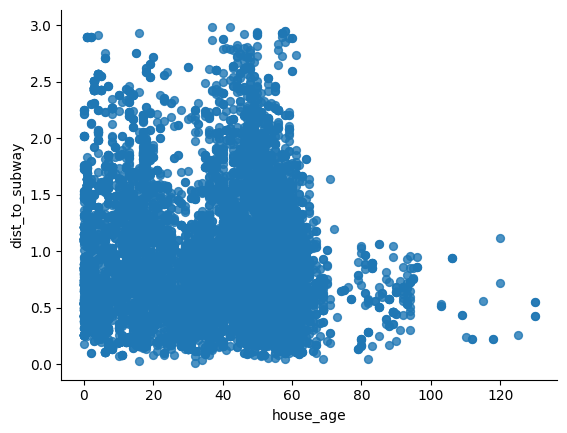

In [9]:
# расстояние от метро до ближайшей станции метро  и возраст дома - 2020 год минус год постройки
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='house_age', y='dist_to_subway', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Разброс мо удалению от метро немного разный, есть небольшая "пропасть", где домам примерно 25-30 лет, т.е. их размещали ближе к метро.
До 25 лет, в осномном тоже - много квартир в продже, рядом с метро.
И уже где-то от 40 лет дома, до 2,5 км расположены и активно продаются.

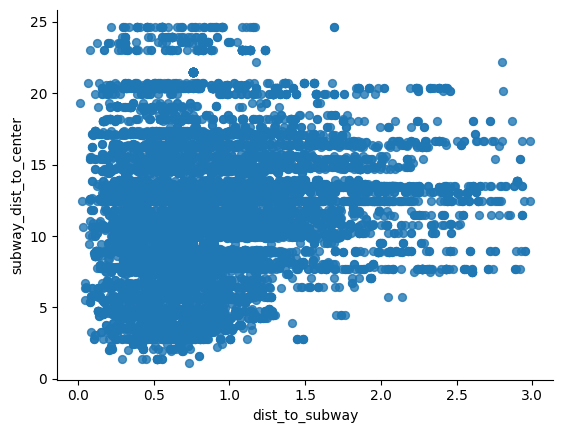

In [11]:
#  расстояние от метро до ближайшей станции метро, расстояние  ближайшей станции метро до центра города в метрах
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='dist_to_subway', y='subway_dist_to_center', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Как видно на графике, в основном это не центр, а немного на удалении от центра, от 10 до 20 км.
Конечно центр тоже активно продается (есть в продаже), где и расстояние до метро от дома тоже маленькое.

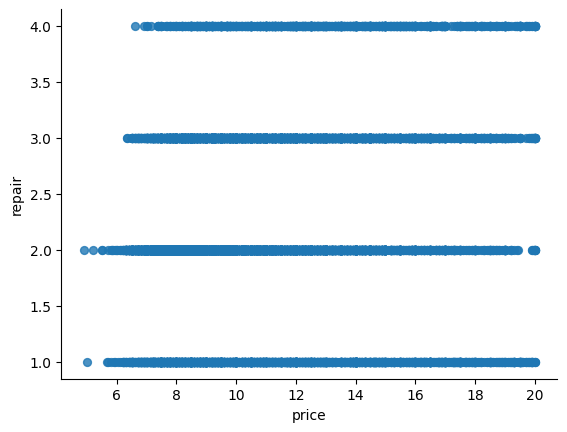

In [8]:
# состояние ремонта и стоимость (1 - худшее, 4 - лучшее)
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='price', y='repair', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

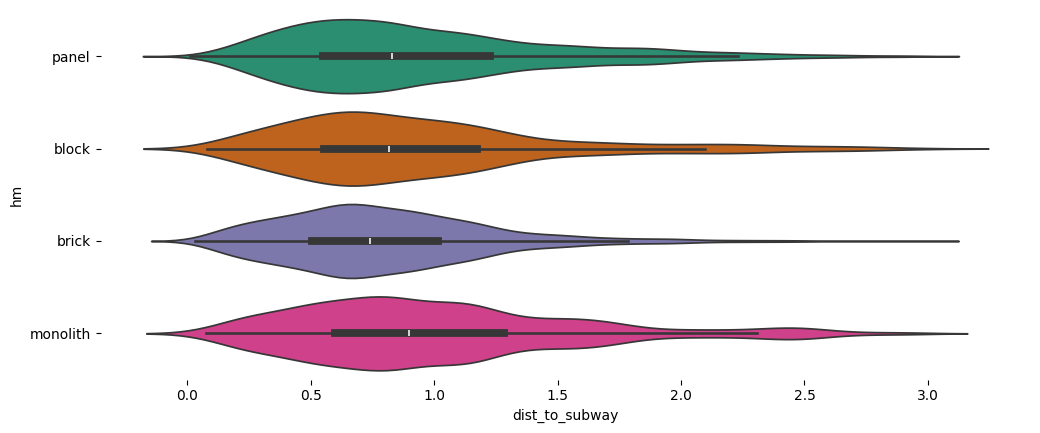

In [6]:
# Материал, из которого построено здание (панельный, блоки, кирпич и монолит)  и расстояние до метро
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='dist_to_subway', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Примерно равномерная выборка по всем вариантам строики дома, рядом с метро (т.е. у метро примерно равномерно распределено), меньше всего - кирпич, крпнее выборка из монолита, т.к. сейчас в нынешнее 10 летее в основном сторили из монолита высотные здания. А панельные активно сторили до этого , их тоже преимущественно побольше в выборке.

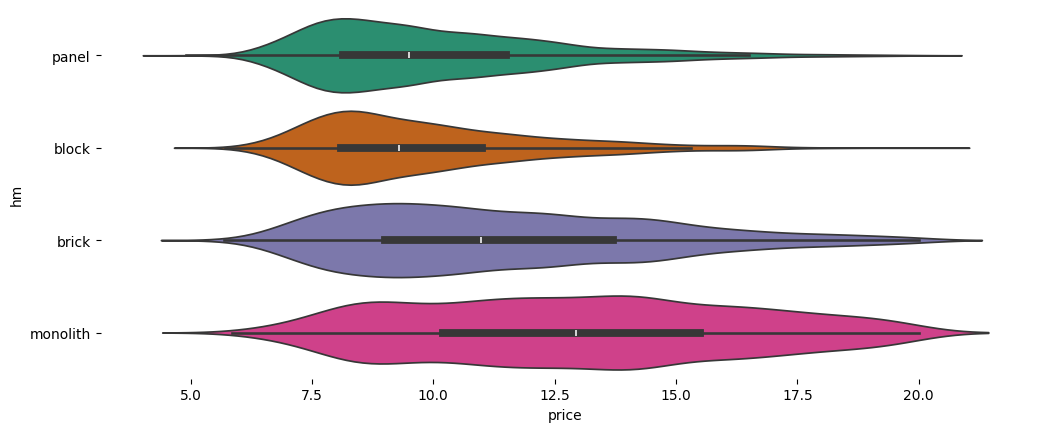

In [12]:
# стоимость и мтериал дома
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['hm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='price', y='hm', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Как писалось выше, в выборке по стоимости -  преобладают дома из монолита, так же и их стоимость более высокая. Кирпич тоже ценен, поэтому дома из кирпича стоят подороже.
Блочные дома в большей степени - не дорогие, панельные так же.

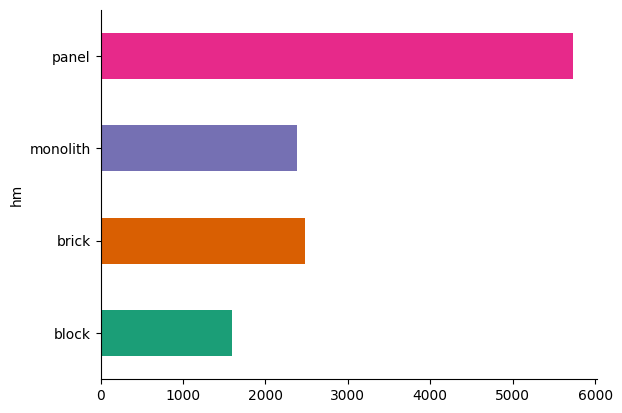

In [13]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('hm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Здесь мы видим, что в датасете, панельных домовбольше всего. Их действительно активно сторили много лет, около 50 лет. Примерно одинаково домов из монолита и кирпича, блочных в меньшей степени. Из монолита строят сейчас , в посление лет 10, то есть это - большие и высокие дома, на примерно 20-30 этажей и выше.

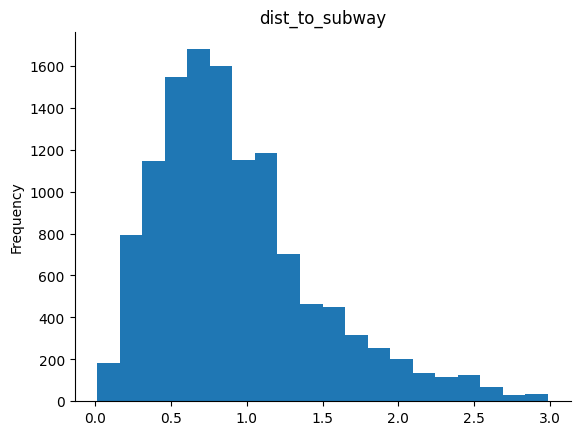

In [14]:
from matplotlib import pyplot as plt
data['dist_to_subway'].plot(kind='hist', bins=20, title='dist_to_subway')
plt.gca().spines[['top', 'right',]].set_visible(False)

Кол-во квартир, продающихся у метро (где-то до килломтера с лишним) больше , особенно в 750 метрах от метро.

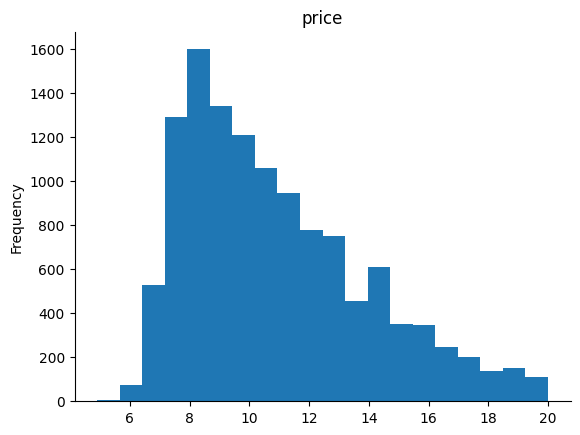

In [15]:
#Основной прайс, составляют от 8 до 10 миллионов руб.
from matplotlib import pyplot as plt
data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

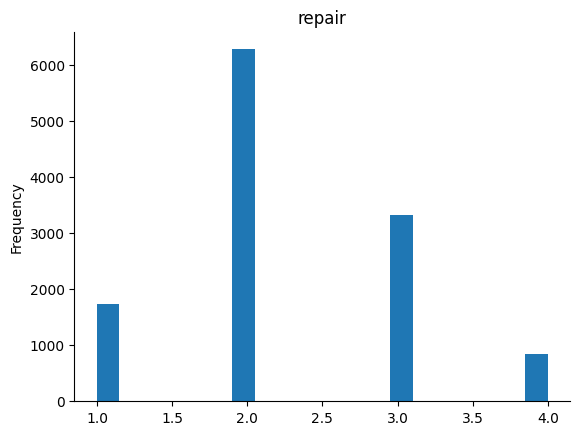

In [16]:
# по уровню состояния ремонта, преобладает что-то почти среднее на 2 и 3 )
from matplotlib import pyplot as plt
data['repair'].plot(kind='hist', bins=20, title='repair')
plt.gca().spines[['top', 'right',]].set_visible(False)

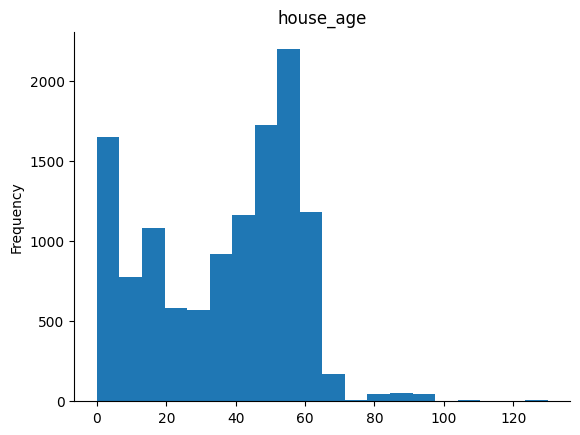

In [18]:
# как можно наблюдать за строительством сейчас, в последнее время, оно увеличилось и почти достигло уровня 1980-1970-х годов, когда активно возводили застройку.
from matplotlib import pyplot as plt
data['house_age'].plot(kind='hist', bins=20, title='house_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

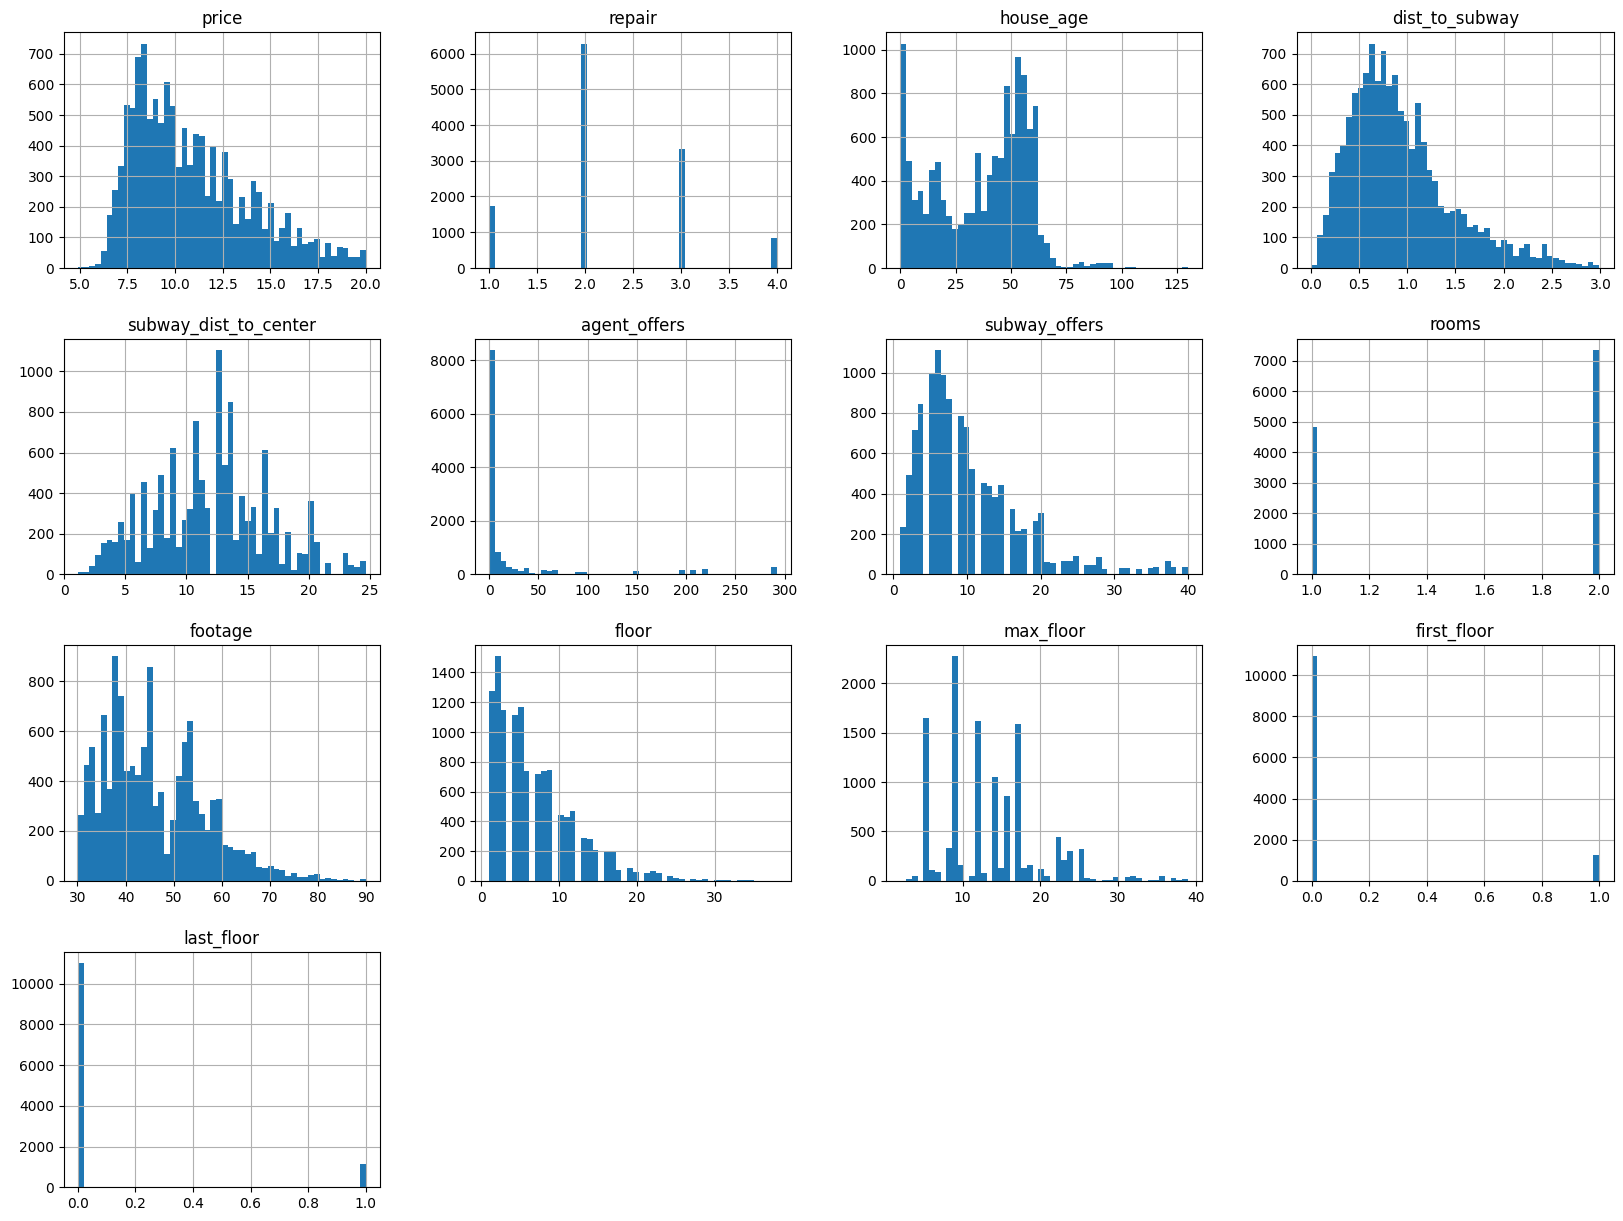

In [31]:
# можно посмотреть на данные графически и их распределение
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [19]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data.head()

,price,repair,house_age,dist_to_subway,subway_dist_to_center,agent_offers,subway_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8.0,3,42,0.960,17.166,1,5,1,39.4,11,12,0,0,UAO,panel
1,7.2,2,43,0.802,17.166,1,9,1,35.6,2,9,0,0,UAO,panel
2,10.3,2,43,0.638,17.166,57,9,2,53.0,5,12,0,0,UAO,panel
3,8.5,2,43,0.929,17.166,292,5,2,44.1,8,9,0,0,UAO,panel
4,9.0,2,43,0.785,17.166,292,5,2,44.2,6,9,0,0,UAO,panel


In [23]:
data.shape

(12181, 15)

In [24]:
data.AO.value_counts()

,count
AO,
UVAO,2053
ZAO,1594
UAO,1496
UZAO,1453
SAO,1422
SVAO,1388
VAO,1362
SZAO,760
CAO,653


In [26]:
data.hm.value_counts()

,count
hm,
panel,5731
brick,2483
monolith,2378
block,1589


In [27]:
pd.isnull(data).any()

,0
price,False
repair,False
house_age,False
dist_to_subway,False
subway_dist_to_center,False
agent_offers,False
subway_offers,False
rooms,False
footage,False
floor,False


In [ ]:
data.describe()

,price,repair,house_age,dist_to_subway,subway_dist_to_center,agent_offers,subway_offers,rooms,footage,floor,max_floor,first_floor,last_floor
count,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,10.869872,2.267302,36.360644,0.928354,11.938048,25.429932,10.176915,1.603973,46.153803,6.867334,13.449306,0.104671,0.094409
std,3.037320,0.787196,21.406406,0.532444,4.711730,61.837916,7.078888,0.489090,10.543171,5.313950,6.413437,0.306142,0.292409
min,4.900000,1.000000,0.000000,0.011000,1.133000,0.000000,1.000000,1.000000,30.100000,1.000000,2.000000,0.000000,0.000000
25%,8.500000,2.000000,17.000000,0.548000,8.635000,1.000000,5.000000,1.000000,38.000000,3.000000,9.000000,0.000000,0.000000
50%,10.200000,2.000000,42.000000,0.820000,12.418000,1.000000,8.000000,2.000000,44.500000,5.000000,12.000000,0.000000,0.000000
75%,12.700000,3.000000,54.000000,1.177000,14.800000,11.000000,13.000000,2.000000,53.400000,9.000000,17.000000,0.000000,0.000000
max,20.000000,4.000000,130.000000,2.988000,24.636000,292.000000,40.000000,2.000000,89.900000,38.000000,39.000000,1.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  float64
 1   repair                 12181 non-null  int64  
 2   house_age              12181 non-null  int64  
 3   dist_to_subway         12181 non-null  float64
 4   subway_dist_to_center  12181 non-null  float64
 5   agent_offers           12181 non-null  int64  
 6   subway_offers          12181 non-null  int64  
 7   rooms                  12181 non-null  int64  
 8   footage                12181 non-null  float64
 9   floor                  12181 non-null  int64  
 10  max_floor              12181 non-null  int64  
 11  first_floor            12181 non-null  int64  
 12  last_floor             12181 non-null  int64  
 13  AO                     12181 non-null  object 
 14  hm                     12181 non-null  object 
dtypes:

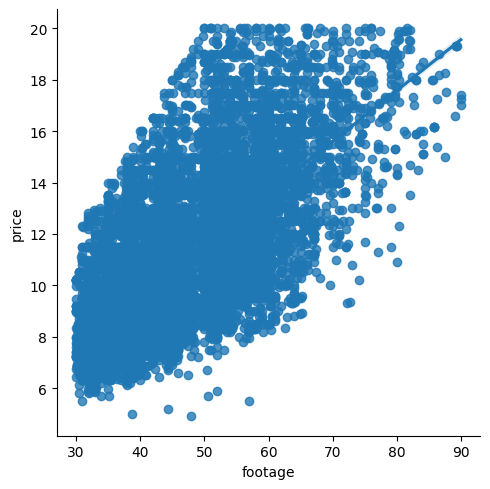

In [35]:
# общий метраж и цена (преобладают не большие квартиры и квартиры до 60 метров, с не высокой стоимостью). (Обычно, продаьб не большую квартиру, гораздо проще, чем большую или огромную)
sns.lmplot(x='footage', y='price', data=data, height=5)
plt.show()

In [38]:
data.isnull().sum()

,0
price,0
repair,0
house_age,0
dist_to_subway,0
subway_dist_to_center,0
agent_offers,0
subway_offers,0
rooms,0
footage,0
floor,0


### Задание 2

Предложите подходящую для задачи эконометрическую модель. Выпишите её в явном виде, аргументируя свой вывод.

Сформулируйте предпосылки теоремы Гаусса-Маркова и объясните, гарантируется ли в данном случае выполнение этих предпосылок и хорошие свойства оценок неизвестных параметров.

Сформулируйте гипотезы о влиянии некоторых факторов на стоимость квартиры.

Предпосылки теоремы Гаусса-Маркова Теорема Гаусса-Маркова утверждает, что оценка параметров линейной модели методом наименьших квадратов (OLS) является минимально дисперсионной среди всех линейных несмещенных оценок при выполнении следующих предпосылок:

1) Линейность: Зависимость между зависимой и независимыми переменными является линейной.

2) Независимость: Наблюдения должны быть независимыми. (роверяем, есть ли автокорреляция остатков, используя тест Дарбина-Уотсона)

3) Гомоскедастичность: Дисперсия ошибки должна быть постоянной для всех значений независимых переменных. (Используем тест Бройша-Пагана или визуализацию остатков)

4) Нормальность ошибок (для проверки гипотез): Ошибки должны быть нормально распределены ( Используем тест Шапиро-Уилка и визуализацию (Q-Q графики)).

5) НетPerfect Multicollinearity: Независимые переменные не должны быть точно линейно зависимыми. (Проверяем мультиколлинеарность с помощью VIF (Variance Inflation Factor).)

Возможные гипотезы о влиянии некоторых факторов на стоимость квартиры могут быть следующими:

Гипотеза 1: Увеличение площади квартиры
 положительно влияет на её стоимость
 (при условии, что другие факторы остаются неизменными).
Гипотеза 2: Увеличение количества комнат
 также положительно сказывается на стоимости.
Гипотеза 3: Местоположение квартиры
 (например, в центре города по сравнению с окраиной) оказывает значительное влияние на стоимость, и можно ожидать, что квартиры в центре будут дороже.
Гипотеза 4: Состояние квартиры (например, на 3-4) воспринимается как позитивный фактор, влияющий на стоимость.
Каждая из этих гипотез может быть проверена с использованием методов регрессионного анализа.

In [49]:
# Определение зависимой и независимых переменных
# Предположим, что 'price' - зависимая переменная,
# и мы рассматриваем площадь (в кв. метрах) и количество комнат
X = data[['footage', 'rooms']]  # Убедитесь, что эти переменные существуют в ваших данных
y = data['price']

In [50]:
# Компьютерные моделирования пропущенных значений
X = pd.get_dummies(X, drop_first=True) # Кодируем категориальные переменные (если есть)

In [51]:
# Добавляем константу к независимым переменным
X = sm.add_constant(X)

In [52]:
# Оценка модели OLS
model = sm.OLS(y, X).fit()
residuals = model.resid

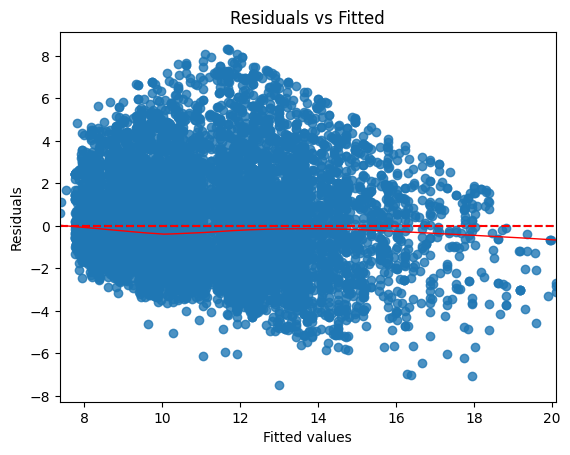

In [53]:
# 1. Проверка линейности: график остатков
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True,
               line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.show()

График остатков против предсказанных значений (fitted values) показал, что остатки распределены вокруг нуля без явных паттернов. Это говорит о том, что модель линейна и что не наблюдается вертикальной структуры (выборки сигнализируют об отсутствии систематической ошибки).

In [54]:
# 2. Проверка независимости: тест Дарбина-Уотсона
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 0.8566835868128596


Статистика Дарбина-Уотсона составила приблизительно 0.857. Значение этой статистики, близкое к 0, указывает на наличие положительной автокорреляции остатков. В идеале эта статистика должна находиться в диапазоне от 1.5 до 2.5, что говорит о независимости наблюдений. Значение ниже 1.5 может указывать на серьезные проблемы с независимостью, что может затруднить интерпретацию коэффициентов модели.

In [55]:
# 3. Проверка гомоскедастичности: тест Бройша-Пагана
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
bp_results = pd.Series(bp_test, index=['LM stat', 'p-value', 'f-value', 'f p-value'])
print(bp_results)

LM stat       4.583437e+02
p-value      2.964396e-100
f-value       2.380736e+02
f p-value    3.767678e-102
dtype: float64


Результаты теста Бройша-Пагана показали:

LM stat: 458.34

p-value: 2.96e-100 (значительно меньше 0.05)

f-value: 238.07

f p-value: 3.77e-102

Очень низкое p-value указывает на наличие гетероскедастичности (непостоянной дисперсии остатков), что нарушает одну из основных предпосылок для применения метода наименьших квадратов. Гетероскедастичность может негативно повлиять на оценку дисперсий коэффициентов и, соответственно, на доверительные интервалы.

In [56]:
# 4. Проверка нормальности ошибок: тест Шапиро-Уилка
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

Shapiro-Wilk Test: Statistic=0.9603336776987808, p-value=4.362206873511694e-49


Результаты теста Шапиро-Уилка показали:

Statistic: 0.960

p-value: 4.36e-49

Низкое значение p-value (< 0.05) указывает на то, что остатки не нормально распределены. Это может быть проблемой для проведения стандартных тестов значимости.

К тому же, Q-Q график подтверждает это, так как точки не совпадают с линией y = x на краях графика, что говорит о наличии выбросов или о том, что распределение не нормальное.

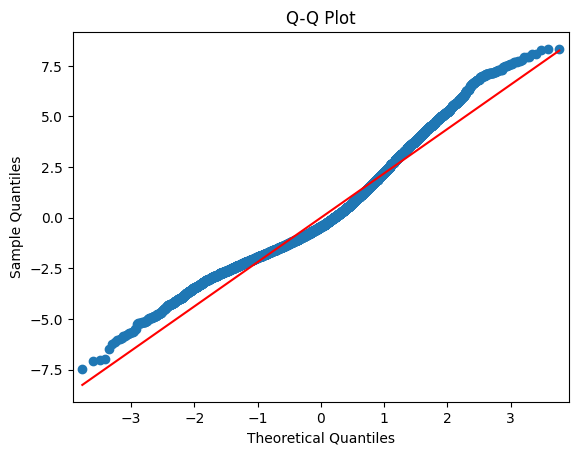

In [57]:
# Q-Q график
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [58]:
# 5. Проверка мультиколлинеарности: VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable        VIF
0    const  20.478676
1  footage   1.740105
2    rooms   1.740105


Индекс варьирования инфляции (VIF) показал:

VIF для (const): 20.48

VIF для (footage): 1.74

VIF для (rooms): 1.74

Значение VIF для свободного члена (const) может быть проигнорировано, однако наличие высоких значений не обязательно указывает на проблему для нескольких других переменных. Общепринятый порог для отделения проблемы мультиколлинеарности ротируется вокруг 5 или 10, поэтому с этими данными особых проблем не наблюдается.

В результате анализа предпосылок теоремы Гаусса-Маркова можно сделать следующие выводы:

Линейная модель не демонстрирует явных признаков нелинейности.

Есть проблемы с независимостью остатков, точнее с автокорреляцией, что требует внимания.

Обнаружена гетероскедастичность остатков, которая может снизить надежность оценки коэффициентов модели.

Остатки модели не нормально распределены, что может быть проблемой при использовании стандартных статистических тестов для значимости.

Мультиколлинеарность представленных переменных не вызывает серьёзных опасений.

Эти результаты можно использовать для улучшения модели, возможно, путем добавления полиномиальных термов, преобразования переменных или использования других подходов, таких как робастные стандарты ошибок, чтобы учитывать гетероскедастичность и автокорреляцию.

### Задание 3

Оцените модель методом наименьших квадратов. Помните о ловушке дамми переменных, если будете использовать их в моделировании.

### Задание 4:

Продиагностируйте модель на:

- статистическую значимость коэффициентов
- мультиколлинеарность (тест [vif](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html))
- нормальность остатков (тест [Харке-Бера](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html#statsmodels.stats.stattools.jarque_bera)  или иные знакомые вам тесты на нормальность)
- гетероскедастичность (тест [Бройша-Пагана](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan), тест Уайта или иные известные вам тесты)

(всякие примеры в семинарских файлах или в [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html#Normality-of-the-residuals) )

Объясните, как результаты анализа влияют на ваши дальнейшие действия.

### Задание 5

Возможно, по результатам тестирования у вас появилось желание убрать или добавить какие-то факторы в модель (если не появилось, сделайте вид, что появилось).

Выберите несколько конкурирующих за ваше внимание моделей и продиагностируйте их.



### Задание 6

Сделайте поправку на гетероскедастичность при помощи команды

sm.OLS(y, x).fit(cov_type = "HC3"),

где ковариационная матрица коэффициентов пресчитывается с более пессимистичными предпосылками о дисперсии ошибок модели. Способы расчёта нумируются от HC0 до HC5 (если кому интересно, описание методов [здесь](https://www.jstatsoft.org/article/view/v011i10).

На что повлияла коррекция в предпосылке о гетероскедастичности ошибок? Нужно ли что-то изменять в модели?

### Задание 7

Для самых удачных, с вашей точки зрения, с помощью пакета Stargazer выведите результаты оценивания.

Прокомментируйте, по каким критериям можно выбрать среди моделей лучшую.

### Задание 8:

На основании больше всего понравившейся модели поясните, подтвердились ли ваши гипотезы о влиянии коэффициентов.

Спрогнозируйте стоимость самой дешёвой квартиры в Москве, которую может построить "Пик-Пик", не нарушая законодательство и законы физики. Возможно, вам для этого придётся сделать ряд дополнительных предположений.

### Замечание:

У данной задачи нет правильного ответа. Вы, как исследователь, можете сделать свои предположения и защищать свою точку зрения.

Тесты могут ошибаться, считайте их советом, а не строгим приказом. Можно руководстоваться здравым смыслом и своими знаниями о московской недвижимости.


### Задание 9 (не обязательное)

Если вы знакомы с машинным обучением и у вас есть идея, как

1. быстрее и лучше оценить минимальную стоимость новостройки в Москве
2. ответить на вопрос, какими параметрами должна обладать такая новостройка

То предложите другой метод решения задачи. Приводить код не обязательно, достаточно будет описания модели для машинного обучения и краткие выводы \ сравнение с эконометрическими результатами